You are working as a Data Analyst for a health insurance company.
The company provides insurance policies to thousands of customers every year. Recently, management observed that insurance claim costs are increasing, but they are not sure which customer factors are driving the cost the most.
🎯 Business Goal
The company wants to:
Identify the key factors that increase medical insurance charges

so they can:
Design risk-based premium plans
Reduce losses caused by high-risk customers
Create fair pricing strategies for customers
Your task is to use Multiple Linear Regression to support this decision.
📁 Dataset Reality (Messy Data)
The dataset contains real-world problems:
Some important columns are categorical (not numeric)
Certain customer attributes are text-based
One column represents geographical regions
Numerical features have very different value ranges
Some variables may be strongly related to each other
The data cannot be used directly for regression.
🧩 Assignment Tasks
✅ Task 1 — Business Understanding
Identify:
The target variable (company’s financial concern)
The input variables related to customer risk
Explain how your regression model helps the company control rising costs, not just predict them.
✅ Task 2 — Data Inspection
Explore the dataset and:
Separate numeric and categorical columns
Identify columns that are not directly usable in regression
Report any data quality issues you observe.
✅ Task 3 — Data Cleaning & Encoding
Convert categorical variables into numeric form.
Decide how to handle:
Region information
Binary attributes like lifestyle indicators
Justify each transformation from a business and modeling perspective.
✅ Task 4 — Feature Scaling & Comparability
Observe differences in value ranges among numeric features.
Explain why scaling is important when comparing regression coefficients.
Prepare the data so the effect of each variable can be fairly interpreted.
⚠️ Task 5 — The Hidden Trap (Multicollinearity)
Analyze relationships between independent variables.
Identify any highly correlated features (example: age, BMI, and lifestyle habits).
Explain:
Why multicollinearity is a problem in Multiple Linear Regression
How it can confuse business decision-making
Take appropriate steps to fix the issue.
✅ Task 6 — Build the Multiple Linear Regression Model
Build a Multiple Linear Regression model using the prepared dataset.
Ensure the model is:
Interpretable
Stable
Suitable for explaining customer cost behavior
✅ Task 7 — Model Evaluation
Evaluate model performance using appropriate regression metrics.
Comment on whether the model is reliable enough to support pricing decisions.
 

In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv("insurance.csv")

df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# Dataset info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
# Check missing values
df.isnull().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
# Separate numeric and categorical columns
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
categorical_cols = df.select_dtypes(include=["object"]).columns

print("Numeric Columns:", numeric_cols)
print("Categorical Columns:", categorical_cols)


Numeric Columns: Index(['age', 'bmi', 'children', 'charges'], dtype='object')
Categorical Columns: Index(['sex', 'smoker', 'region'], dtype='object')


In [7]:
# Encode sex and smoker
df['sex'] = df['sex'].map({'male': 1, 'female': 0})
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})


In [8]:
df = pd.get_dummies(df, columns=['region'], drop_first=True)


In [9]:
df.head()


,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,False,False,True
1,18,1,33.770,1,0,1725.55230,False,True,False
2,28,1,33.000,3,0,4449.46200,False,True,False
3,33,1,22.705,0,0,21984.47061,True,False,False
4,32,1,28.880,0,0,3866.85520,True,False,False


In [10]:
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df.drop('charges', axis=1)
y = df['charges']

# Scale numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)


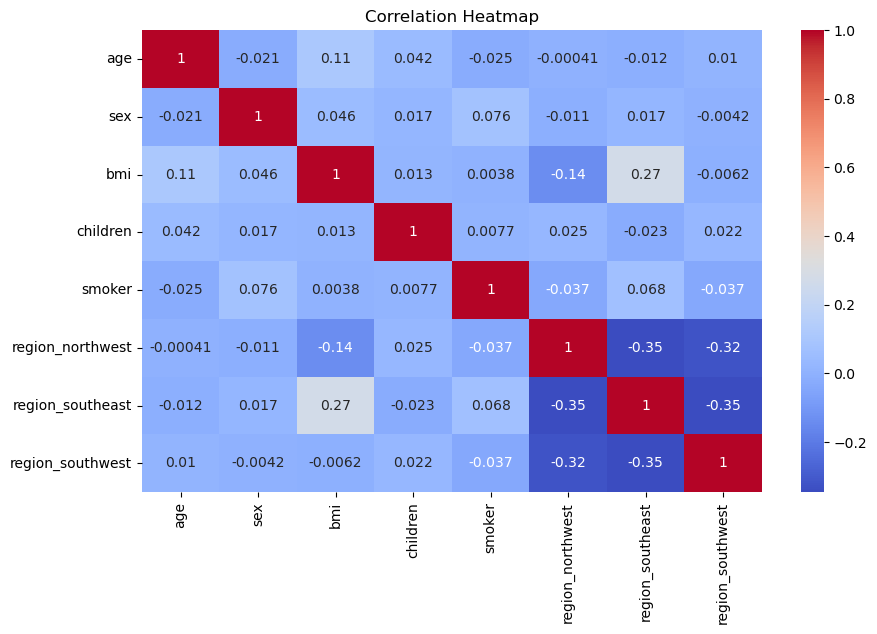

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(X.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled.values, i)
                   for i in range(X_scaled.shape[1])]

vif_data


,Feature,VIF
0,age,1.016822
1,sex,1.008900
2,bmi,1.106630
3,children,1.004011
4,smoker,1.012074
5,region_northwest,1.518823
6,region_southeast,1.652230
7,region_southwest,1.529411


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Build model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [14]:
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})

coefficients.sort_values(by="Coefficient", ascending=False)


,Feature,Coefficient
4,smoker,9544.251089
0,age,3609.149018
2,bmi,2054.885063
3,children,512.478869
1,sex,-9.295337
5,region_northwest,-158.959435
6,region_southeast,-292.759080
7,region_southwest,-347.270359


In [15]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Predictions
y_pred = model.predict(X_test)

# Metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R2 Score:", r2)
print("MAE:", mae)
print("RMSE:", rmse)


R2 Score: 0.7835929767120722
MAE: 4181.194473753654
RMSE: 5796.284659276275


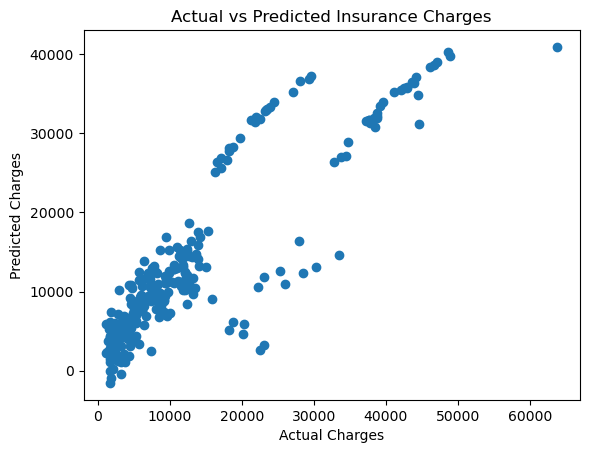

In [16]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Insurance Charges")
plt.show()
